# Python Plots

In [1]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.offline as plo

In [2]:
#read CSV files
costco = pd.read_csv("costcos-geocoded.csv")
ppg = pd.read_csv("ppg2008.csv")

costco_sum = pd.Series.to_frame(costco.groupby('State')['Address'].count())
costco_sum = costco_sum.rename({'Address':'store_count'}, axis=1, inplace=False)
costco_sum = pd.DataFrame(costco_sum.to_records())

## Python - Heat Map

<AxesSubplot:>

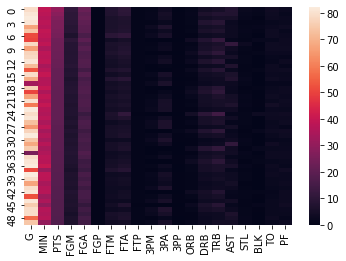

In [3]:
sns.heatmap(ppg.iloc[:,1:])

## Python - Contour chart

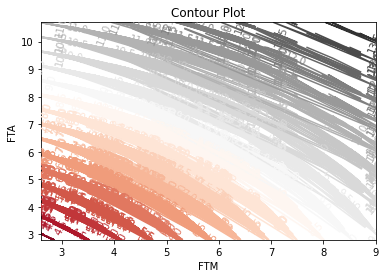

In [4]:
%matplotlib inline

def f(x, y):
    return np.sqrt(x**2 + y**2)

x = np.array(ppg['FTM'])
y = np.array(ppg['FTA'])

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure()
cp = plt.contour(X, Y, Z, 20, cmap='RdGy')
plt.clabel(cp, inline=True, 
          fontsize=10)
plt.title('Contour Plot')
plt.xlabel('FTM')
plt.ylabel('FTA')
plt.show()

## Python - Spatial Plot

In [5]:
data=[dict(type='choropleth', autocolorscale = False,
           locations=costco_sum['State'], z=costco_sum['store_count'], 
           locationmode='USA-states', colorscale='YlOrRd', 
           colorbar=dict(title='Store Count'))]

layout = dict(title='Python-Spatial Plot',
              geo=dict(scope='usa', projection=dict(type='albers usa'), 
                       showlakes=True, lakecolor='rgb(66,165,245)'))

fig=dict(data=data, layout=layout)

plo.plot(fig)

'temp-plot.html'